source: https://colab.research.google.com/github/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/Train_YOLO_Models.ipynb

### **Verify NVIDIA GPU Availability**

Make sure you're using a GPU-equipped machine by going to "Runtime" -> "Change runtime type" in the top menu bar, and then selecting one of the GPU options in the Hardware accelerator section. Click Play on the following code block to verify that the NVIDIA GPU is present and ready for training.

In [1]:
!nvidia-smi

Tue Dec  2 22:51:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **Unzip uploaded dataset**

In [2]:
!unzip -q data.zip -d data

### **Install Requirements (Ultralytics)**

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00


### **Run Training**



In [4]:
!yolo detect train data=data/data.yaml model=yolo11s.pt epochs=1 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0,

### **Test model**

In [5]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test/images save=True

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,427,119 parameters, 0 gradients, 21.4 GFLOPs

image 1/22 /content/data/test/images/0_jpg.rf.01ebb5df5b6782f438f14a9cb039279d.jpg: 640x640 (no detections), 15.8ms
image 2/22 /content/data/test/images/0_jpg.rf.33f8c745d5c65e7058bcc86faef3cc66.jpg: 640x640 1 1m, 15.7ms
image 3/22 /content/data/test/images/0_jpg.rf.e88217a8d459cbdd4f350fe2f1b3d0d8.jpg: 640x640 1 1m, 15.7ms
image 4/22 /content/data/test/images/0_jpg.rf.f030efc30a3b5a10d1a4933ecde94503.jpg: 640x640 1 tyun, 15.7ms
image 5/22 /content/data/test/images/1_jpg.rf.193d27b0a87500a338f9cac3b6142f38.jpg: 640x640 1 tyun, 15.7ms
image 6/22 /content/data/test/images/1_jpg.rf.b2849e0e1c2bbc6674aa9927a82719dc.jpg: 640x640 (no detections), 15.7ms
image 7/22 /content/data/test/images/1_jpg.rf.f93b03e6f45aa656169d6c9cb3a87412.jpg: 640x640 1 1m, 1 minami, 13.2ms
image 8/22 /content/data/test/images/2_jpg.rf.24c721d7e50c799

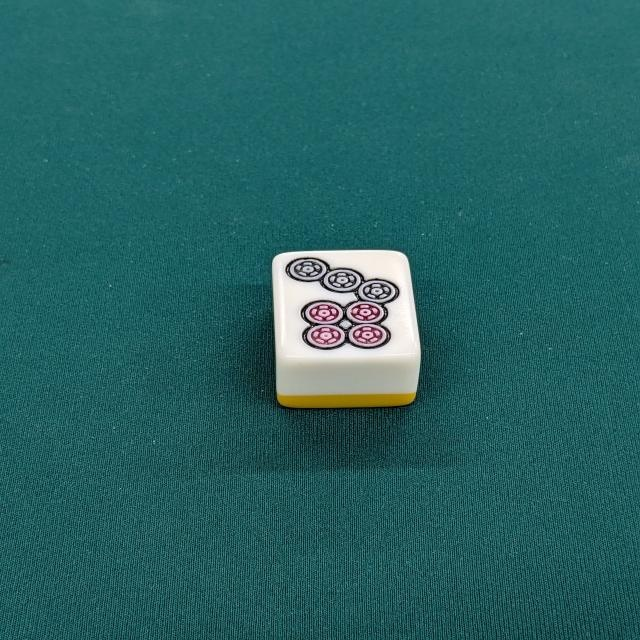

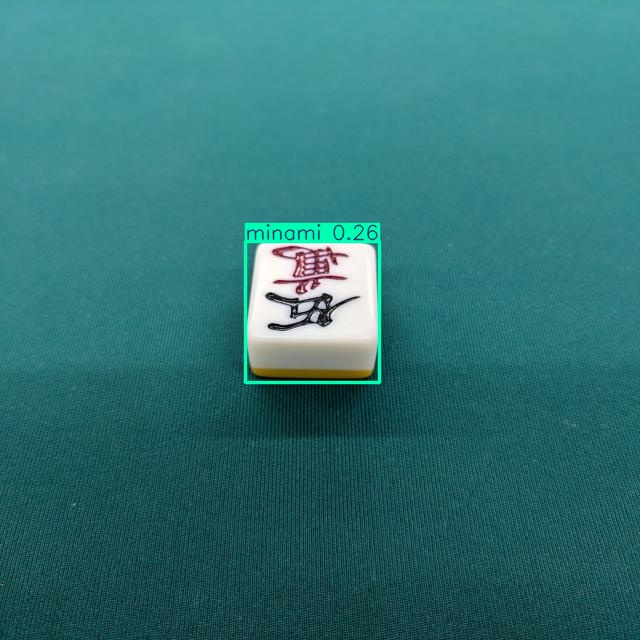

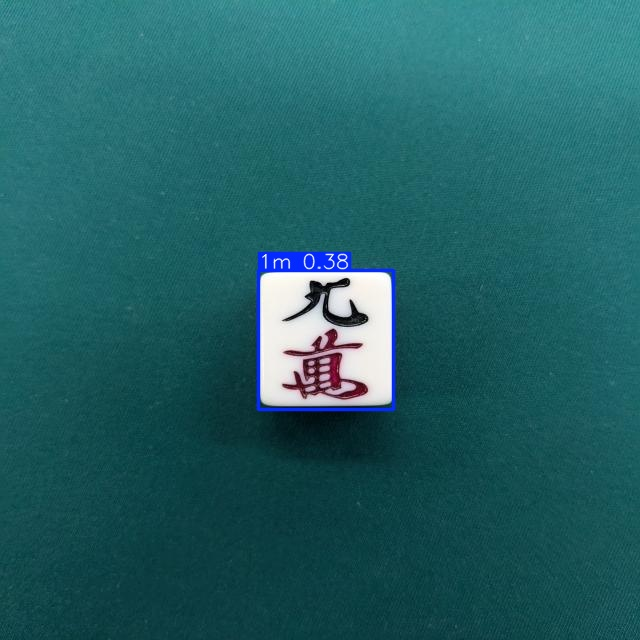

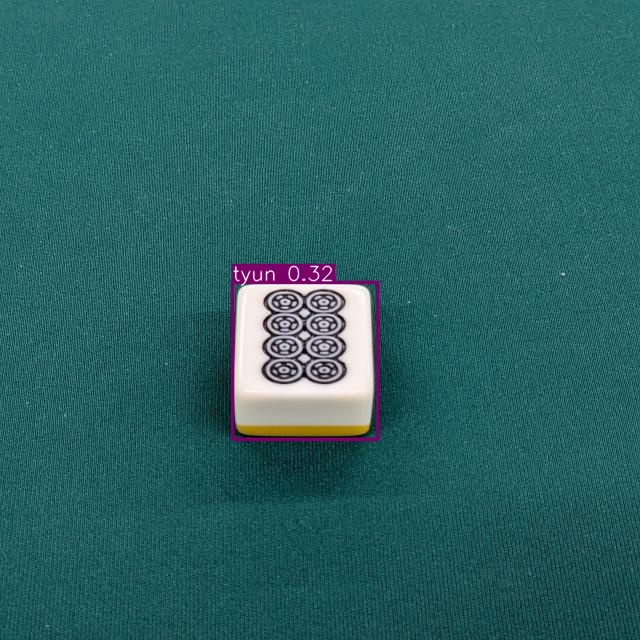

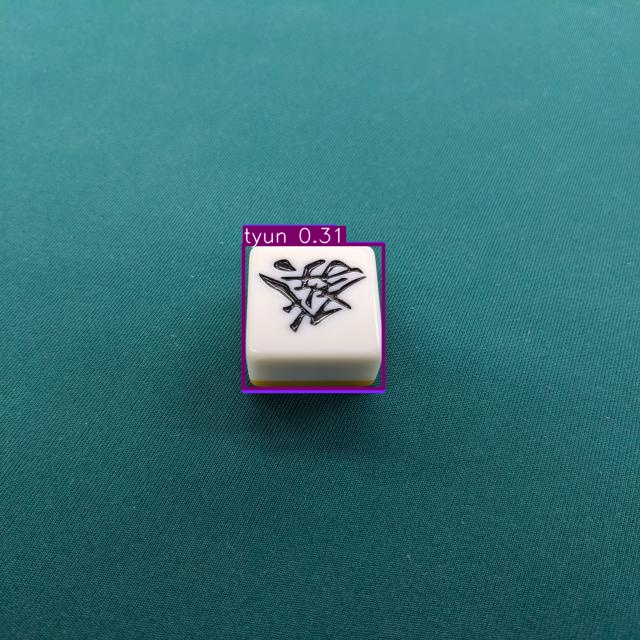

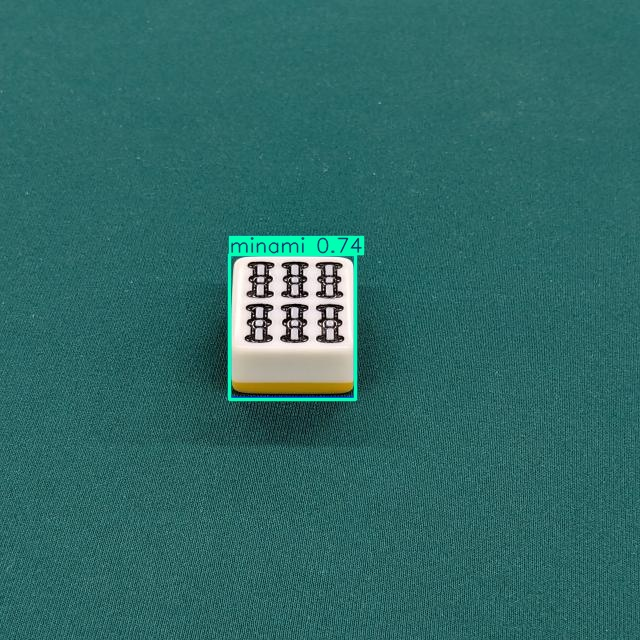

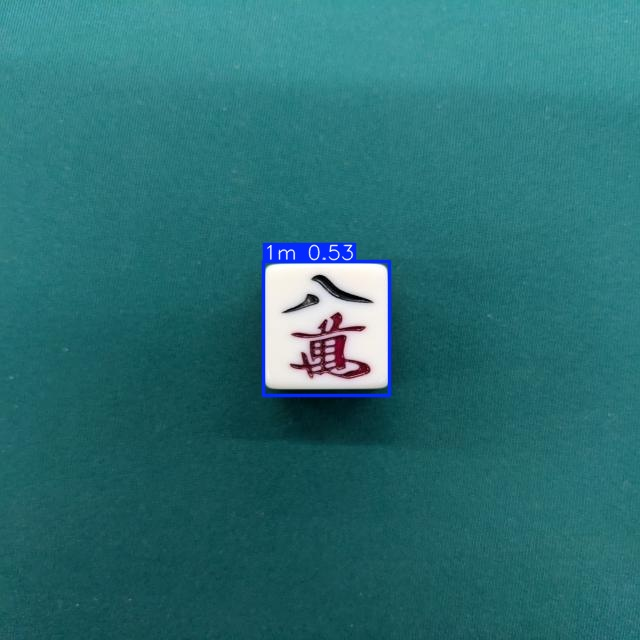

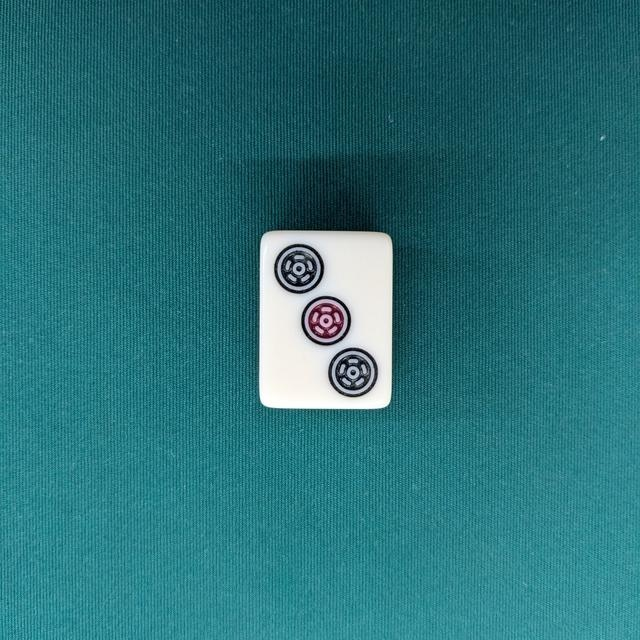

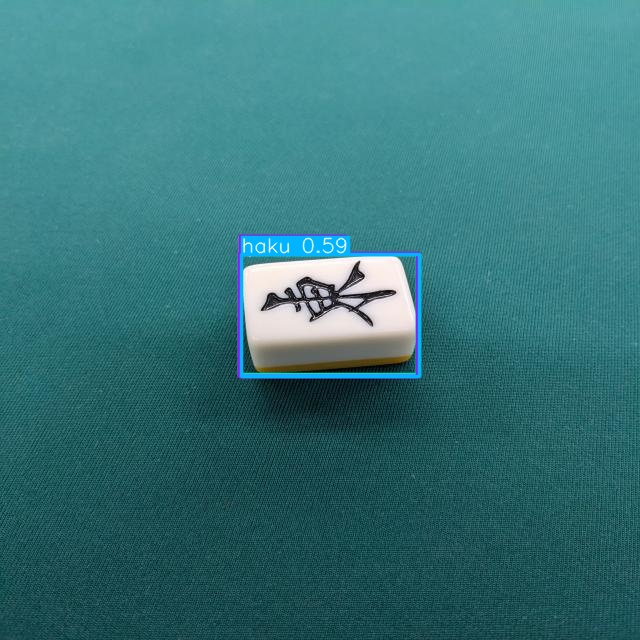

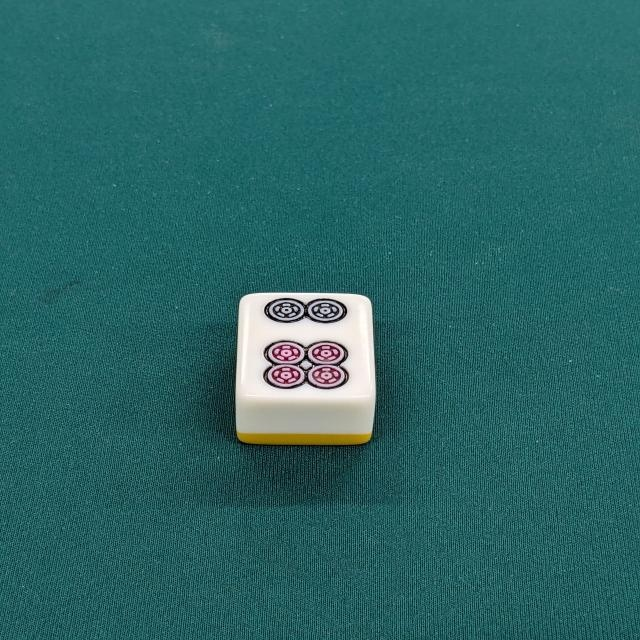

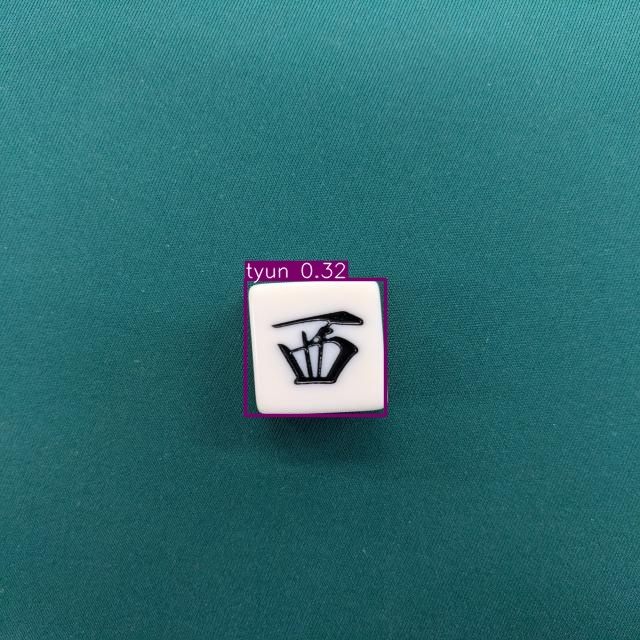

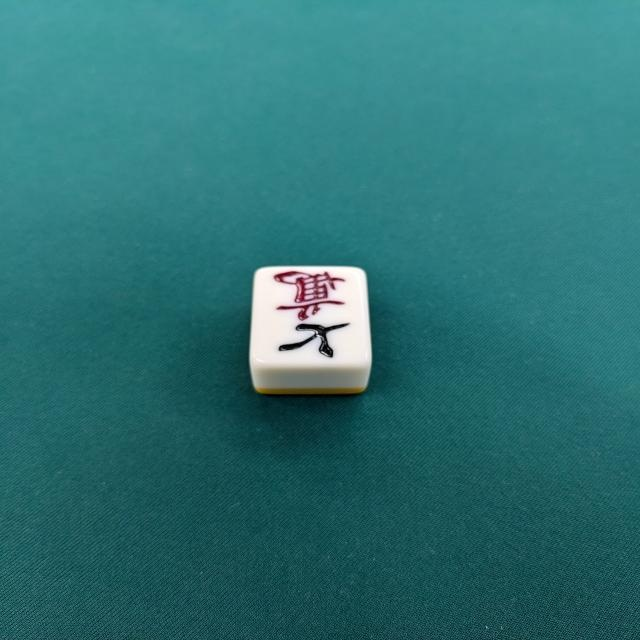

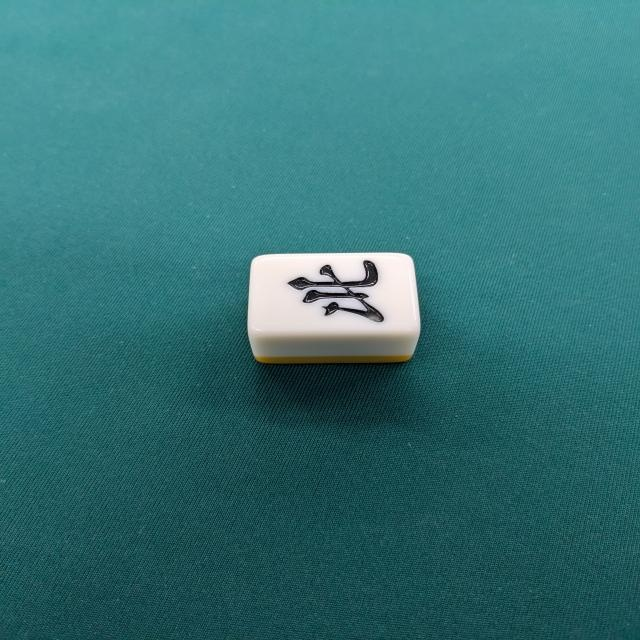

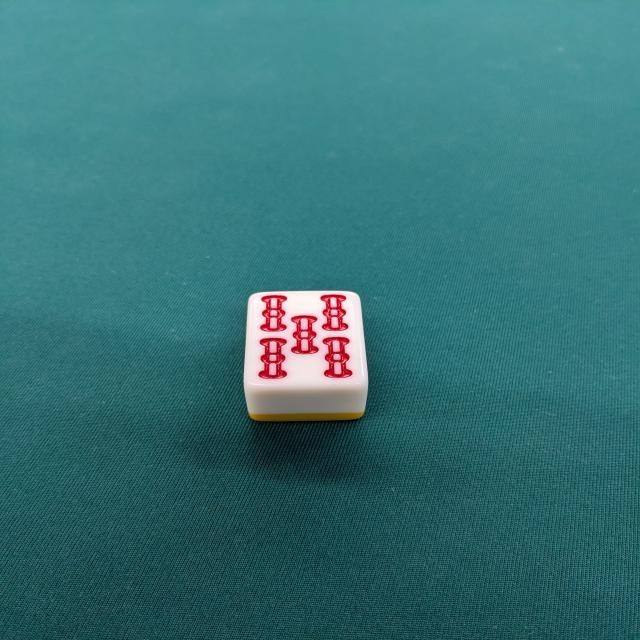

In [6]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=400))
  print('\n')

### **Export to TFLite**

In [8]:
!yolo export model=runs/detect/train/weights/best.pt format=tflite

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11s summary (fused): 100 layers, 9,427,119 parameters, 0 gradients, 21.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 41, 8400) (18.3 MB)
E0000 00:00:1764716179.614034    2478 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764716179.619276    2478 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764716179.632811    2478 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:17647

### **Test TFLite model**

In [9]:
!yolo predict model=runs/detect/train/weights/best_saved_model/best_float32.tflite source=data/test/images save=True

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
E0000 00:00:1764716240.788911    2800 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764716240.795286    2800 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764716240.811079    2800 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764716240.811106    2800 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764716240.811110    2800 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764716240.811113    2800 c

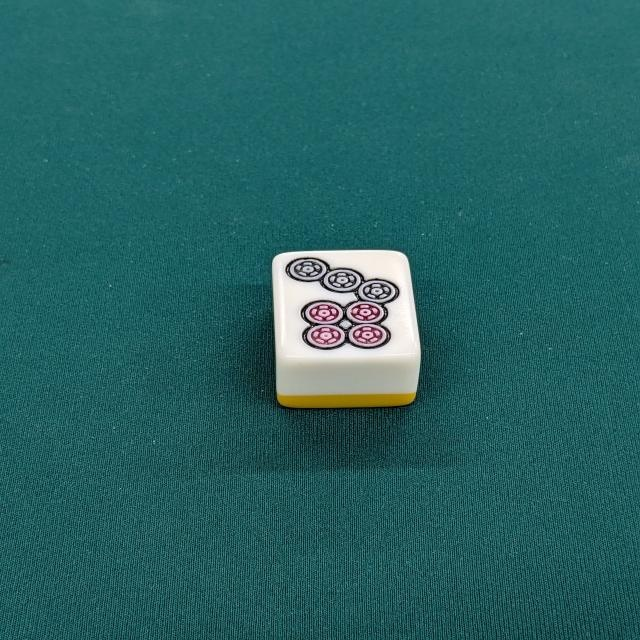

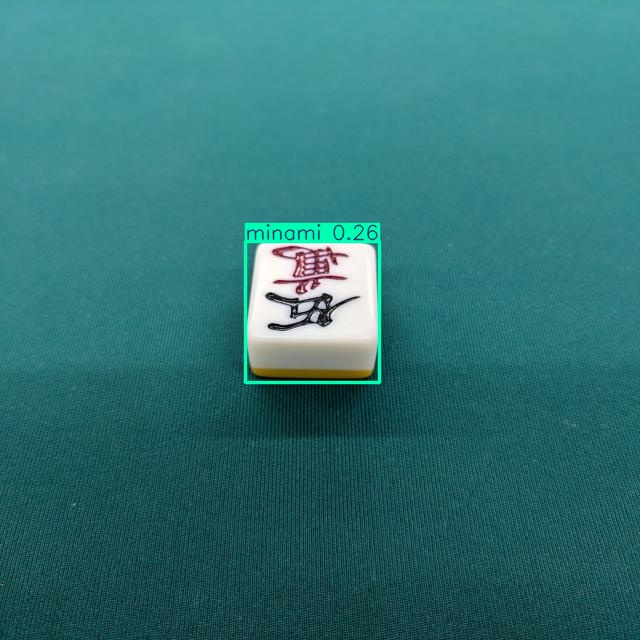

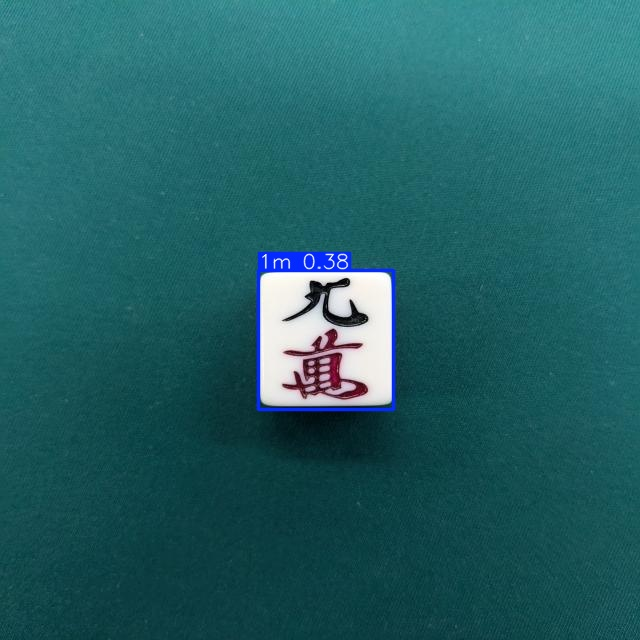

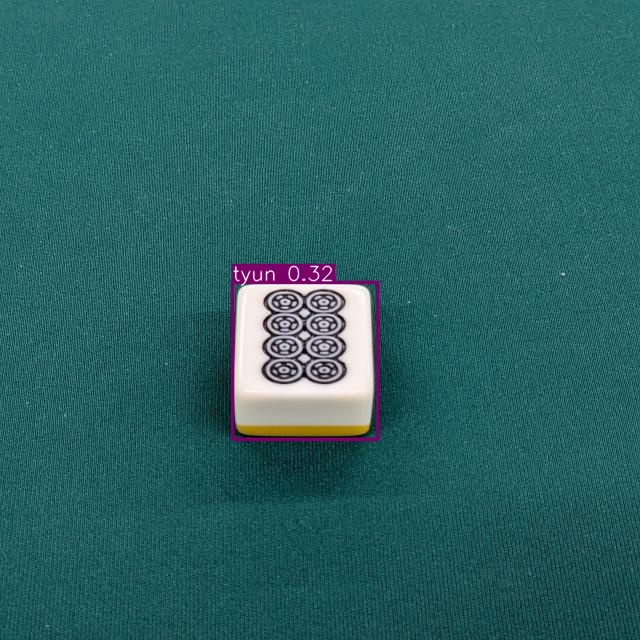

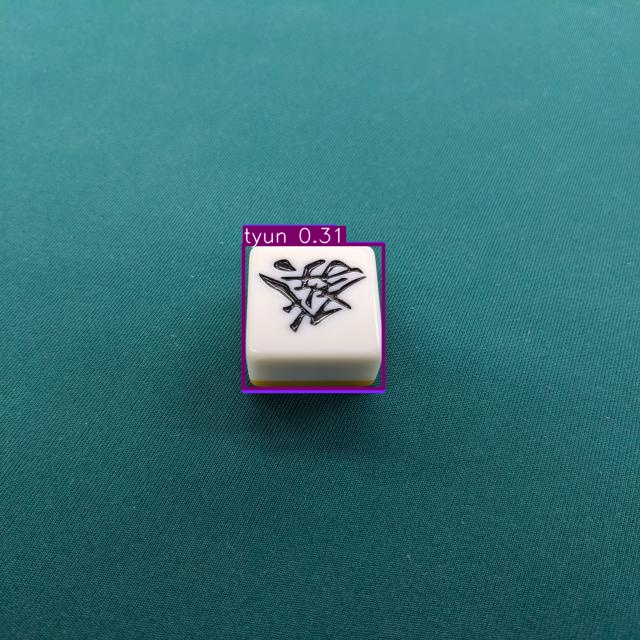

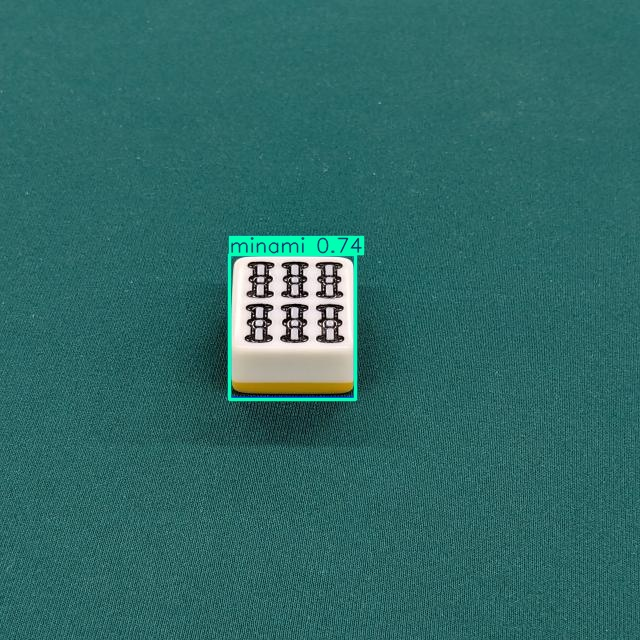

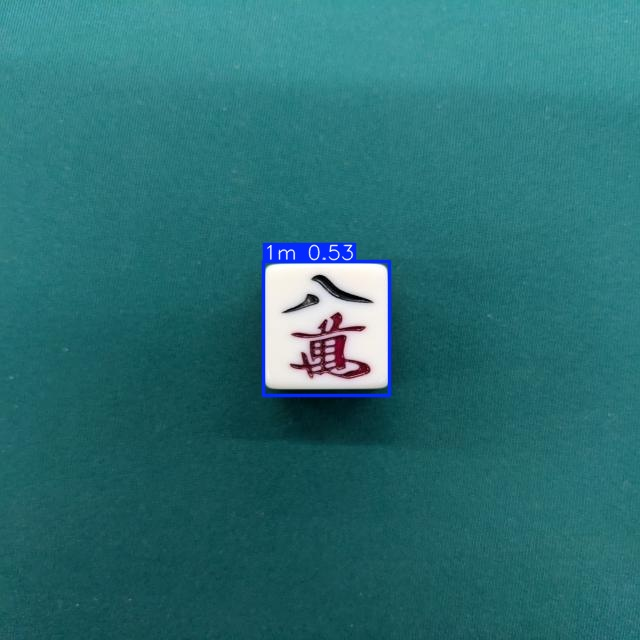

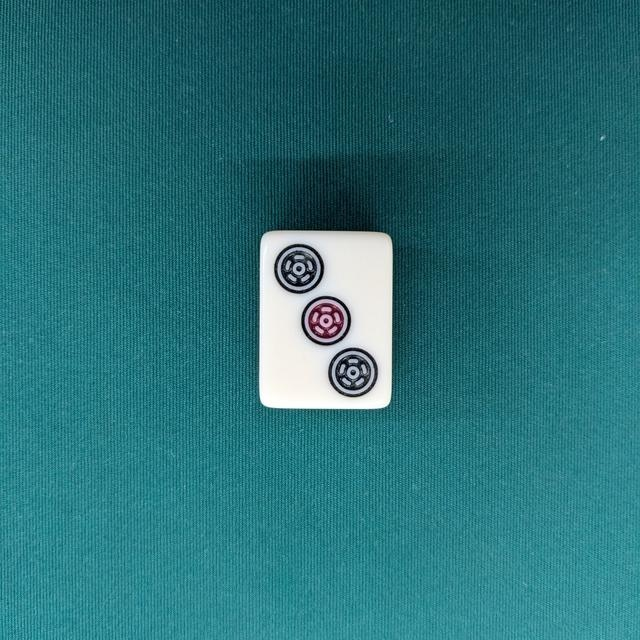

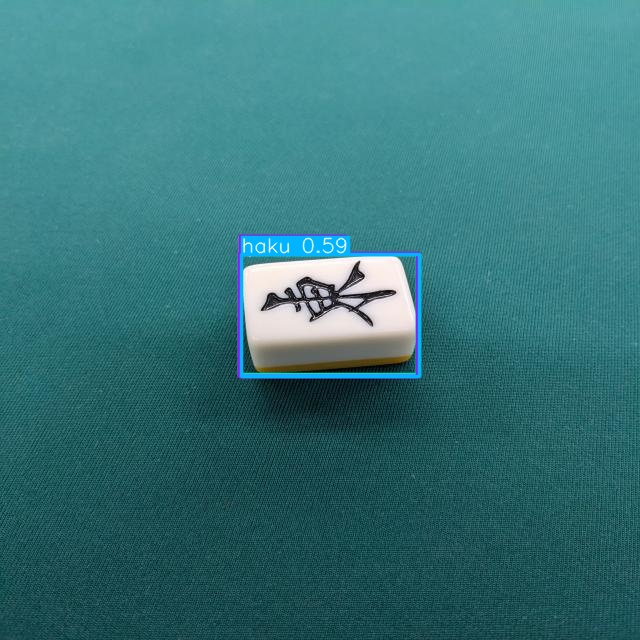

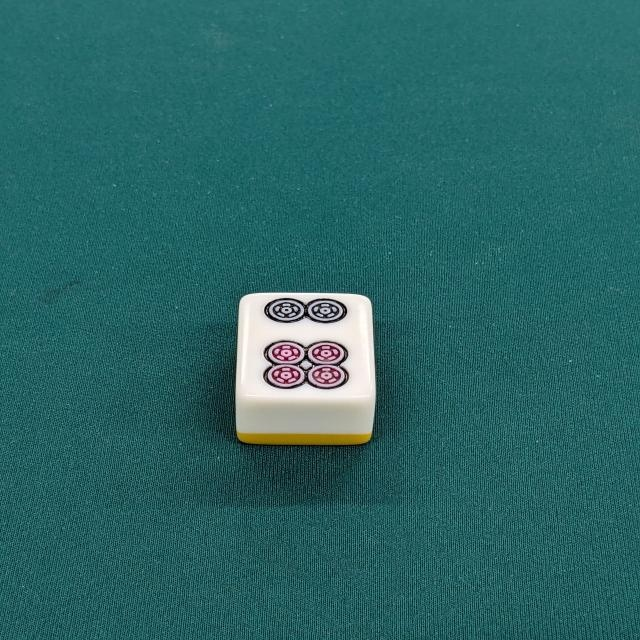

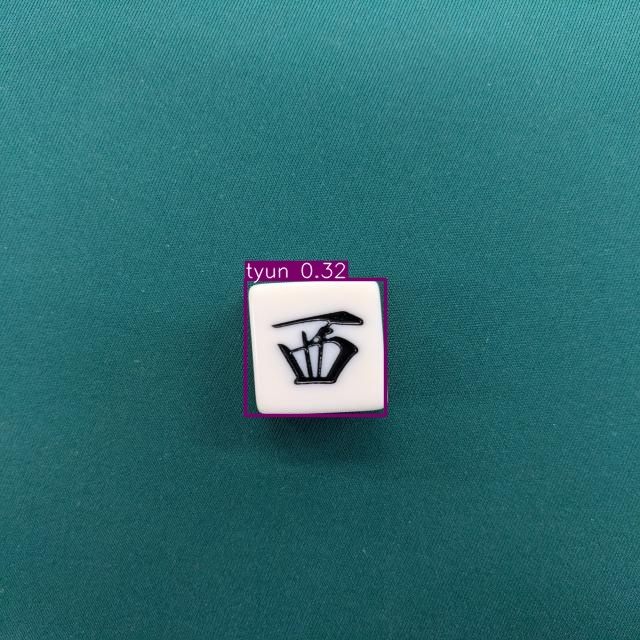

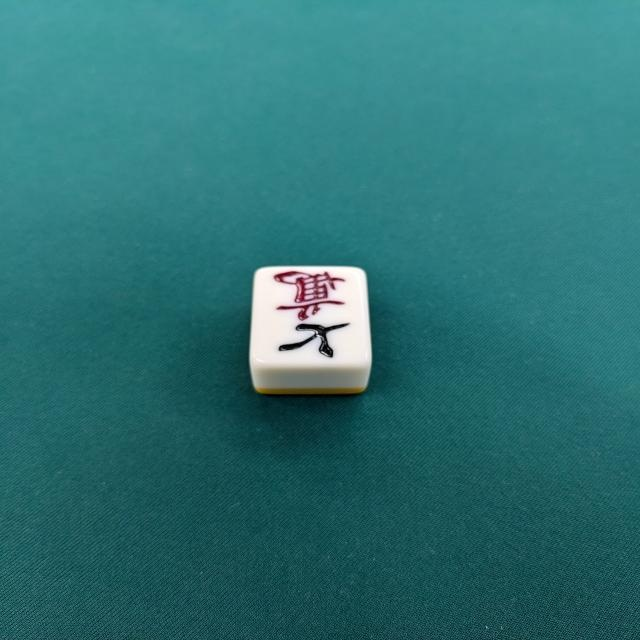

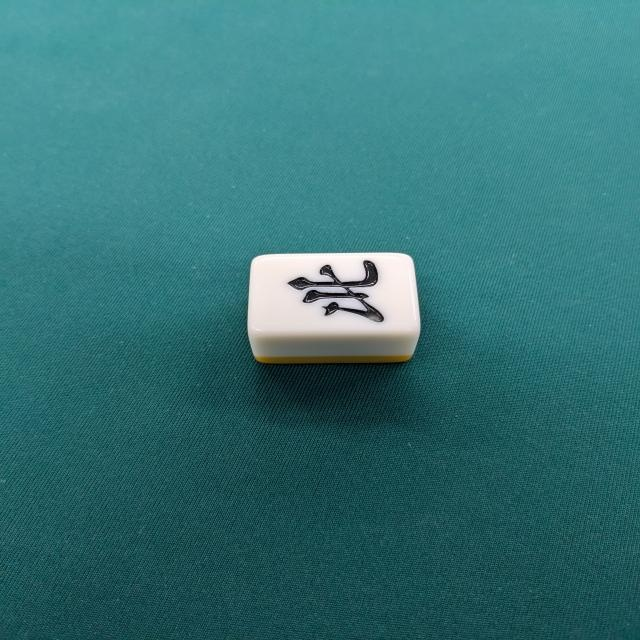

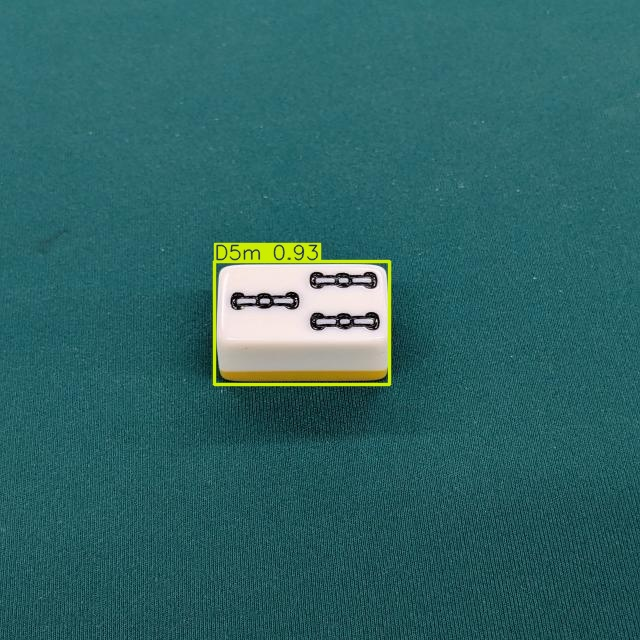

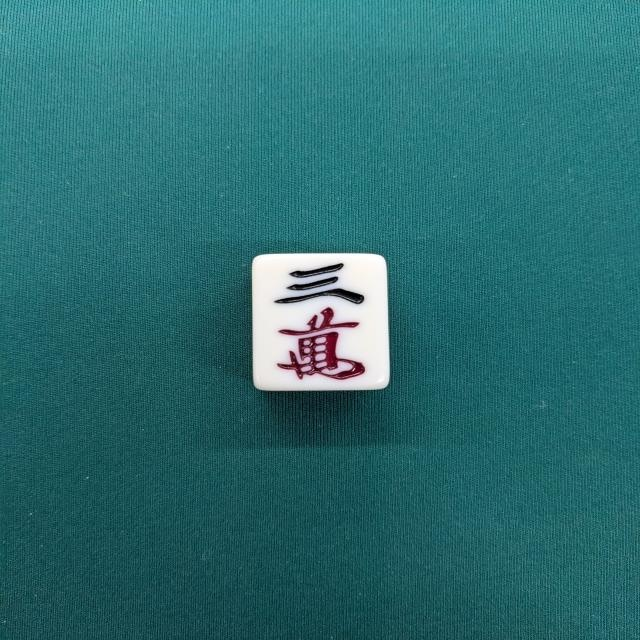

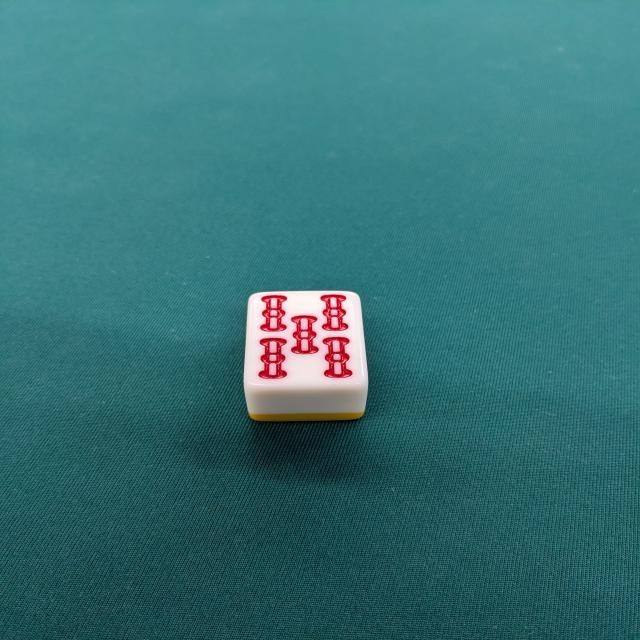

In [10]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path, height=400))
  print('\n')

### **Download TFLite models**

In [ ]:
from google.colab import files

files.download('runs/detect/train/weights/best_saved_model/best_float16.tflite')
files.download('runs/detect/train/weights/best_saved_model/best_float32.tflite')